# Predict_Face
This notebook will guide you through all the steps described in this article to build and train your ML model for removing the face mask of the person's face.

In [2]:
# requird for training
!pip install opencv-python
!pip install tensorflow-addons
!pip install trianglesolver==1.2
!pip install dotmap==1.3.23
!pip install mtcnn
!pip install lpips

  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   -------------------------- ------------ 491.5/719.8 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 719.8/719.8 kB 9.0 MB/s eta 0:00:00
  Using cached dotmap-1.3.23-py3-none-any.whl (10 kB)
  Attempting uninstall: dotmap
    Found existing installation: dotmap 1.3.30
    Uninstalling dotmap-1.3.30:
      Successfully uninstalled dotmap-1.3.30


In [1]:
# Necessary imports
import os
import tarfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import download_data
from utils.configuration import Configuration
from utils.data_generator import DataGenerator
from utils.architectures import UNet
from utils.model import Predict_FaceModel

ModuleNotFoundError: No module named 'mask_utils'

In [4]:
# setup HW

# is GPU available
gpu_physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_physical_devices) > 0:
    tf.config.experimental.set_memory_growth(gpu_physical_devices[0], True)

# check HW availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

Num GPUs Available:  0
Num CPUs Available:  1


## 1) Preconditions
First we need a dataset of human faces.

In [5]:
# Check if dataset is already downloaded or needs to be downloaded.
configuration = Configuration()
dataset_path = configuration.get('input_images_path')
if os.path.isdir(dataset_path):
    print('Dataset already downloaded')
else:
    print('Downloading dataset')
    dataset_archive_path = os.path.join('data', 'lfw-deepfunneled.tgz')
    download_data(configuration.get('dataset_archive_download_url'), dataset_archive_path)
    print('Extracting dataset')
    tar = tarfile.open(dataset_archive_path, 'r:gz')
    tar.extractall('data')
    tar.close()
    print('Done')

Dataset already downloaded


## 2) Data generation
Next step is to generate data for neural network training. We need input images (person with a face mask) and corresponding output image (the same image as input but without the face mask). We already have output images in downloaded dataset. Input images will be created by adding mask on the faces with a help from [MaskTheFace GitHub](https://github.com/aqeelanwar/MaskTheFace) project.

In [8]:
# setup the pipeline and generate data

dg = DataGenerator(configuration)

train_folder = configuration.get('train_data_path')
test_folder = configuration.get('test_data_path')

if os.path.exists(train_folder) and os.path.exists(test_folder):
    print('Testing and training data already generated')
else:
    dg.generate_images()
'''
print('Here are few examples of generated data.')
n_examples = 5
inputs, outputs = dg.get_dataset_examples(n_examples)
f, axarr = plt.subplots(2, n_examples, figsize=(20, 10))
for i in range(len(inputs)):
    axarr[1, i].imshow(mpimg.imread(inputs[i]))
    axarr[1, i].axis('off')
    axarr[0, i].imshow(mpimg.imread(outputs[i]))
    axarr[0, i].axis('off')
'''

Testing and training data already generated


"\nprint('Here are few examples of generated data.')\nn_examples = 5\ninputs, outputs = dg.get_dataset_examples(n_examples)\nf, axarr = plt.subplots(2, n_examples, figsize=(20, 10))\nfor i in range(len(inputs)):\n    axarr[1, i].imshow(mpimg.imread(inputs[i]))\n    axarr[1, i].axis('off')\n    axarr[0, i].imshow(mpimg.imread(outputs[i]))\n    axarr[0, i].axis('off')\n"

## 3) Model training
Now we have all the data, and we can initiate model and start training.

In [ ]:
# Feel free to experiment with the number of filters, their sizes or any other parameters
filters = (64, 128, 128, 256, 256, 512)
kernels = (7, 7, 7, 3, 3, 3)
input_image_size = (256, 256, 3)
architecture = UNet.RESNET
training_epochs = 20
batch_size = 12

In [ ]:
%load_ext autoreload
%autoreload 2
from utils.model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
'''
#Create instance of model and start training
model = Predict_FaceModel.build_model(architecture=architecture, input_size=input_image_size, filters=filters,
                                   kernels=kernels, configuration=configuration)

model.summary()
training_epochs=50
model.train(epochs=training_epochs, batch_size=batch_size, loss_function='LPIPS_loss')
'''

# Load pretrained model
model = Predict_FaceModel.load_model('models\LPIPS_loss.h5')

## 4) Results
Our model is trained, and we can look at it's performance

1/1 [==============================] - 0s 30ms/step
(220, 242)
1/1 [==============================] - 1s 1s/step


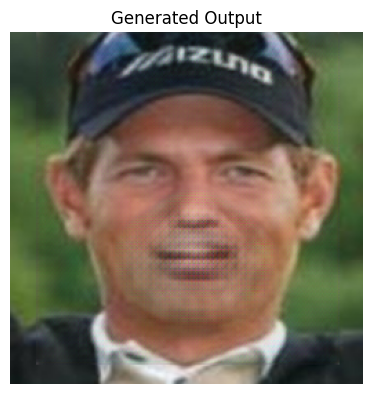

In [20]:

# Define the path to your specific image
input_img = 'input_images/000000.png'

# Preprocess the image if necessary (resize, normalize, etc.)
# For example:
# input_img = preprocess_image(input_img)

# Perform object detection on the input image using the model
generated_output = model.predict(input_img)

# Plot the input image and the generated output
plt.figure(figsize=(10, 5))
'''
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(input_img))
plt.title('Input Image')
plt.axis('off')
'''
plt.subplot(1, 2, 2)
plt.imshow(generated_output)
plt.title('Generated Output')
plt.axis('off')

plt.show()